# 第7章 支持向量机

1．支持向量机最简单的情况是线性可分支持向量机，或硬间隔支持向量机。构建它的条件是训练数据线性可分。其学习策略是最大间隔法。可以表示为凸二次规划问题，其原始最优化问题为

$$\min _{w, b} \frac{1}{2}\|w\|^{2}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right)-1 \geqslant 0, \quad i=1,2, \cdots, N$$

求得最优化问题的解为$w^*$，$b^*$，得到线性可分支持向量机，分离超平面是

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数是

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

最大间隔法中，函数间隔与几何间隔是重要的概念。

线性可分支持向量机的最优解存在且唯一。位于间隔边界上的实例点为支持向量。最优分离超平面由支持向量完全决定。
二次规划问题的对偶问题是
$$\min \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j}\left(x_{i} \cdot x_{j}\right)-\sum_{i=1}^{N} \alpha_{i}$$

$$s.t. \quad \sum_{i=1}^{N} \alpha_{i} y_{i}=0$$

$$\alpha_{i} \geqslant 0, \quad i=1,2, \cdots, N$$

通常，通过求解对偶问题学习线性可分支持向量机，即首先求解对偶问题的最优值
 
$a^*$，然后求最优值$w^*$和$b^*$，得出分离超平面和分类决策函数。

2．现实中训练数据是线性可分的情形较少，训练数据往往是近似线性可分的，这时使用线性支持向量机，或软间隔支持向量机。线性支持向量机是最基本的支持向量机。

对于噪声或例外，通过引入松弛变量$\xi_{\mathrm{i}}$，使其“可分”，得到线性支持向量机学习的凸二次规划问题，其原始最优化问题是

$$\min _{w, b, \xi} \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{N} \xi_{i}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right) \geqslant 1-\xi_{i}, \quad i=1,2, \cdots, N$$

$$\xi_{i} \geqslant 0, \quad i=1,2, \cdots, N$$

求解原始最优化问题的解$w^*$和$b^*$，得到线性支持向量机，其分离超平面为

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数为

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

线性可分支持向量机的解$w^*$唯一但$b^*$不唯一。对偶问题是

$$\min _{\alpha} \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j}\left(x_{i} \cdot x_{j}\right)-\sum_{i=1}^{N} \alpha_{i}$$

$$s.t. \quad \sum_{i=1}^{N} \alpha_{i} y_{i}=0$$

$$0 \leqslant \alpha_{i} \leqslant C, \quad i=1,2, \cdots, N$$

线性支持向量机的对偶学习算法，首先求解对偶问题得到最优解$\alpha^*$，然后求原始问题最优解$w^*$和$b^*$，得出分离超平面和分类决策函数。

对偶问题的解$\alpha^*$中满$\alpha_{i}^{*}>0$的实例点$x_i$称为支持向量。支持向量可在间隔边界上，也可在间隔边界与分离超平面之间，或者在分离超平面误分一侧。最优分离超平面由支持向量完全决定。

线性支持向量机学习等价于最小化二阶范数正则化的合页函数

$$\sum_{i=1}^{N}\left[1-y_{i}\left(w \cdot x_{i}+b\right)\right]_{+}+\lambda\|w\|^{2}$$

3．非线性支持向量机

对于输入空间中的非线性分类问题，可以通过非线性变换将它转化为某个高维特征空间中的线性分类问题，在高维特征空间中学习线性支持向量机。由于在线性支持向量机学习的对偶问题里，目标函数和分类决策函数都只涉及实例与实例之间的内积，所以不需要显式地指定非线性变换，而是用核函数来替换当中的内积。核函数表示，通过一个非线性转换后的两个实例间的内积。具体地，$K(x,z)$是一个核函数，或正定核，意味着存在一个从输入空间x到特征空间的映射$\mathcal{X} \rightarrow \mathcal{H}$，对任意$\mathcal{X}$，有

$$K(x, z)=\phi(x) \cdot \phi(z)$$

对称函数$K(x,z)$为正定核的充要条件如下：对任意$$\mathrm{x}_{\mathrm{i}} \in \mathcal{X}, \quad \mathrm{i}=1,2, \ldots, \mathrm{m}$$，任意正整数$m$，对称函数$K(x,z)$对应的Gram矩阵是半正定的。

所以，在线性支持向量机学习的对偶问题中，用核函数$K(x,z)$替代内积，求解得到的就是非线性支持向量机

$$f(x)=\operatorname{sign}\left(\sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K\left(x, x_{i}\right)+b^{*}\right)$$

4．SMO算法

SMO算法是支持向量机学习的一种快速算法，其特点是不断地将原二次规划问题分解为只有两个变量的二次规划子问题，并对子问题进行解析求解，直到所有变量满足KKT条件为止。这样通过启发式的方法得到原二次规划问题的最优解。因为子问题有解析解，所以每次计算子问题都很快，虽然计算子问题次数很多，但在总体上还是高效的。


----
分离超平面：$w^Tx+b=0$

点到直线距离：$r=\frac{|w^Tx+b|}{||w||_2}$

$||w||_2$为2-范数：$||w||_2=\sqrt[2]{\sum^m_{i=1}w_i^2}$

直线为超平面，样本可表示为：

$w^Tx+b\ \geq+1$

$w^Tx+b\ \leq+1$

#### margin：

**函数间隔**：$label(w^Tx+b)\ or\ y_i(w^Tx+b)$

**几何间隔**：$r=\frac{label(w^Tx+b)}{||w||_2}$，当数据被正确分类时，几何间隔就是点到超平面的距离

为了求几何间隔最大，SVM基本问题可以转化为求解:($\frac{r^*}{||w||}$为几何间隔，(${r^*}$为函数间隔)

$$\max\ \frac{r^*}{||w||}$$

$$(subject\ to)\ y_i({w^T}x_i+{b})\geq {r^*},\ i=1,2,..,m$$

分类点几何间隔最大，同时被正确分类。但这个方程并非凸函数求解，所以要先①将方程转化为凸函数，②用拉格朗日乘子法和KKT条件求解对偶问题。

①转化为凸函数：

先令${r^*}=1$，方便计算（参照衡量，不影响评价结果）

$$\max\ \frac{1}{||w||}$$

$$s.t.\ y_i({w^T}x_i+{b})\geq {1},\ i=1,2,..,m$$

再将$\max\ \frac{1}{||w||}$转化成$\min\ \frac{1}{2}||w||^2$求解凸函数，1/2是为了求导之后方便计算。

$$\min\ \frac{1}{2}||w||^2$$

$$s.t.\ y_i(w^Tx_i+b)\geq 1,\ i=1,2,..,m$$

②用拉格朗日乘子法和KKT条件求解最优值：

$$\min\ \frac{1}{2}||w||^2$$

$$s.t.\ -y_i(w^Tx_i+b)+1\leq 0,\ i=1,2,..,m$$

整合成：

$$L(w, b, \alpha) = \frac{1}{2}||w||^2+\sum^m_{i=1}\alpha_i(-y_i(w^Tx_i+b)+1)$$

推导：$\min\ f(x)=\min \max\ L(w, b, \alpha)\geq \max \min\ L(w, b, \alpha)$

根据KKT条件：

$$\frac{\partial }{\partial w}L(w, b, \alpha)=w-\sum\alpha_iy_ix_i=0,\ w=\sum\alpha_iy_ix_i$$

$$\frac{\partial }{\partial b}L(w, b, \alpha)=\sum\alpha_iy_i=0$$

代入$ L(w, b, \alpha)$

$\min\  L(w, b, \alpha)=\frac{1}{2}||w||^2+\sum^m_{i=1}\alpha_i(-y_i(w^Tx_i+b)+1)$

$\qquad\qquad\qquad=\frac{1}{2}w^Tw-\sum^m_{i=1}\alpha_iy_iw^Tx_i-b\sum^m_{i=1}\alpha_iy_i+\sum^m_{i=1}\alpha_i$

$\qquad\qquad\qquad=\frac{1}{2}w^T\sum\alpha_iy_ix_i-\sum^m_{i=1}\alpha_iy_iw^Tx_i+\sum^m_{i=1}\alpha_i$

$\qquad\qquad\qquad=\sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i=1}\alpha_iy_iw^Tx_i$

$\qquad\qquad\qquad=\sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)$

再把max问题转成min问题：

$\max\ \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)=\min \frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)-\sum^m_{i=1}\alpha_i$

$s.t.\ \sum^m_{i=1}\alpha_iy_i=0,$

$ \alpha_i \geq 0,i=1,2,...,m$

以上为SVM对偶问题的对偶形式

-----
#### kernel

在低维空间计算获得高维空间的计算结果，也就是说计算结果满足高维（满足高维，才能说明高维下线性可分）。

#### soft margin & slack variable

引入松弛变量$\xi\geq0$，对应数据点允许偏离的functional margin 的量。

目标函数：

$$\min\ \frac{1}{2}||w||^2+C\sum\xi_i\qquad s.t.\ y_i(w^Tx_i+b)\geq1-\xi_i$$ 

对偶问题：

$$\max\ \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)=\min \frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)-\sum^m_{i=1}\alpha_i$$

$$s.t.\ C\geq\alpha_i \geq 0,i=1,2,...,m\quad \sum^m_{i=1}\alpha_iy_i=0,$$

-----

#### Sequential Minimal Optimization

首先定义特征到结果的输出函数：$u=w^Tx+b$.

因为$w=\sum\alpha_iy_ix_i$

有$u=\sum y_i\alpha_iK(x_i, x)-b$


----

$$\max \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i=1}\sum^m_{j=1}\alpha_i\alpha_jy_iy_j<\phi(x_i)^T,\phi(x_j)>$$

$$s.t.\ \sum^m_{i=1}\alpha_iy_i=0,$$

$$ \alpha_i \geq 0,i=1,2,...,m$$

-----
参考资料：

[1] :[Lagrange Multiplier and KKT](http://blog.csdn.net/xianlingmao/article/details/7919597)

[2] :[推导SVM](https://my.oschina.net/dfsj66011/blog/517766)

[3] :[机器学习算法实践-支持向量机(SVM)算法原理](http://pytlab.org/2017/08/15/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%AE%97%E6%B3%95%E5%AE%9E%E8%B7%B5-%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA-SVM-%E7%AE%97%E6%B3%95%E5%8E%9F%E7%90%86/)

[4] :[Python实现SVM](http://blog.csdn.net/wds2006sdo/article/details/53156589)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    # print(data)
    return data[:, :2], data[:, -1]

In [3]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

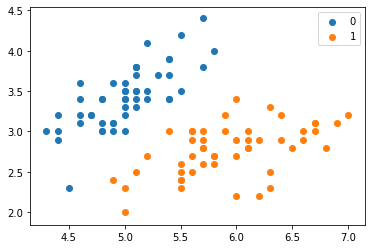

In [4]:
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

----



In [5]:
class SVM:
    def __init__(self, max_iter=100, kernel='linear'):
        self.max_iter = max_iter
        self._kernel = kernel

    def init_args(self, features, labels):
        self.m, self.n = features.shape
        self.X = features
        self.Y = labels
        self.b = 0.0

        # 将Ei保存在一个列表里
        self.alpha = np.ones(self.m)
        self.E = [self._E(i) for i in range(self.m)]
        # 松弛变量
        self.C = 1.0

    def _KKT(self, i):
        y_g = self._g(i) * self.Y[i]
        if self.alpha[i] == 0:
            return y_g >= 1
        elif 0 < self.alpha[i] < self.C:
            return y_g == 1
        else:
            return y_g <= 1

    # g(x)预测值，输入xi（X[i]）
    def _g(self, i):
        r = self.b
        for j in range(self.m):
            r += self.alpha[j] * self.Y[j] * self.kernel(self.X[i], self.X[j])
        return r

    # 核函数
    def kernel(self, x1, x2):
        if self._kernel == 'linear':
            return sum([x1[k] * x2[k] for k in range(self.n)])
        elif self._kernel == 'poly':
            return (sum([x1[k] * x2[k] for k in range(self.n)]) + 1)**2

        return 0

    # E（x）为g(x)对输入x的预测值和y的差
    def _E(self, i):
        return self._g(i) - self.Y[i]

    def _init_alpha(self):
        # 外层循环首先遍历所有满足0<a<C的样本点，检验是否满足KKT
        index_list = [i for i in range(self.m) if 0 < self.alpha[i] < self.C]
        # 否则遍历整个训练集
        non_satisfy_list = [i for i in range(self.m) if i not in index_list]
        index_list.extend(non_satisfy_list)

        for i in index_list:
            if self._KKT(i):
                continue

            E1 = self.E[i]
            # 如果E2是+，选择最小的；如果E2是负的，选择最大的
            if E1 >= 0:
                j = min(range(self.m), key=lambda x: self.E[x])
            else:
                j = max(range(self.m), key=lambda x: self.E[x])
            return i, j

    def _compare(self, _alpha, L, H):
        if _alpha > H:
            return H
        elif _alpha < L:
            return L
        else:
            return _alpha

    def fit(self, features, labels):
        self.init_args(features, labels)

        for t in range(self.max_iter):
            # train
            i1, i2 = self._init_alpha()

            # 边界
            if self.Y[i1] == self.Y[i2]:
                L = max(0, self.alpha[i1] + self.alpha[i2] - self.C)
                H = min(self.C, self.alpha[i1] + self.alpha[i2])
            else:
                L = max(0, self.alpha[i2] - self.alpha[i1])
                H = min(self.C, self.C + self.alpha[i2] - self.alpha[i1])

            E1 = self.E[i1]
            E2 = self.E[i2]
            # eta=K11+K22-2K12
            eta = self.kernel(self.X[i1], self.X[i1]) + self.kernel(
                self.X[i2],
                self.X[i2]) - 2 * self.kernel(self.X[i1], self.X[i2])
            if eta <= 0:
                # print('eta <= 0')
                continue

            alpha2_new_unc = self.alpha[i2] + self.Y[i2] * (
                E1 - E2) / eta  #此处有修改，根据书上应该是E1 - E2，书上130-131页
            alpha2_new = self._compare(alpha2_new_unc, L, H)

            alpha1_new = self.alpha[i1] + self.Y[i1] * self.Y[i2] * (
                self.alpha[i2] - alpha2_new)

            b1_new = -E1 - self.Y[i1] * self.kernel(self.X[i1], self.X[i1]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i1]) * (alpha2_new - self.alpha[i2]) + self.b
            b2_new = -E2 - self.Y[i1] * self.kernel(self.X[i1], self.X[i2]) * (
                alpha1_new - self.alpha[i1]) - self.Y[i2] * self.kernel(
                    self.X[i2],
                    self.X[i2]) * (alpha2_new - self.alpha[i2]) + self.b

            if 0 < alpha1_new < self.C:
                b_new = b1_new
            elif 0 < alpha2_new < self.C:
                b_new = b2_new
            else:
                # 选择中点
                b_new = (b1_new + b2_new) / 2

            # 更新参数
            self.alpha[i1] = alpha1_new
            self.alpha[i2] = alpha2_new
            self.b = b_new

            self.E[i1] = self._E(i1)
            self.E[i2] = self._E(i2)
        return 'train done!'

    def predict(self, data):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * self.kernel(data, self.X[i])

        return 1 if r > 0 else -1

    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)

    def _weight(self):
        # linear model
        yx = self.Y.reshape(-1, 1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

In [6]:
svm = SVM(max_iter=200)

In [7]:
svm.fit(X_train, y_train)

'train done!'

In [8]:
svm.score(X_test, y_test)

0.64

### scikit-learn实例

In [9]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [10]:
clf.score(X_test, y_test)

0.96

### sklearn.svm.SVC

*(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None,random_state=None)*

参数：

- C：C-SVC的惩罚参数C?默认值是1.0

C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。

- kernel ：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
    
    – 线性：u'v
    
    – 多项式：(gamma*u'*v + coef0)^degree

    – RBF函数：exp(-gamma|u-v|^2)

    – sigmoid：tanh(gamma*u'*v + coef0)


- degree ：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。


- gamma ： ‘rbf’,‘poly’ 和‘sigmoid’的核函数参数。默认是’auto’，则会选择1/n_features


- coef0 ：核函数的常数项。对于‘poly’和 ‘sigmoid’有用。


- probability ：是否采用概率估计？.默认为False


- shrinking ：是否采用shrinking heuristic方法，默认为true


- tol ：停止训练的误差值大小，默认为1e-3


- cache_size ：核函数cache缓存大小，默认为200


- class_weight ：类别的权重，字典形式传递。设置第几类的参数C为weight*C(C-SVC中的C)


- verbose ：允许冗余输出？


- max_iter ：最大迭代次数。-1为无限制。


- decision_function_shape ：‘ovo’, ‘ovr’ or None, default=None3


- random_state ：数据洗牌时的种子值，int值


主要调节的参数有：C、kernel、degree、gamma、coef0。

## 第7章支持向量机-习题

### 习题7.1
&emsp;&emsp;比较感知机的对偶形式与线性可分支持向景机的对偶形式。

**解答：**  
**感知机算法的原始形式：**  
给定一个训练数据集$$T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}$$其中，$x_i \in \mathcal{X} = R^n, y_i \in \mathcal{Y}=\{-1,1\}, i=1,2,\cdots,N$，求参数$w,b$，使其为以下损失函数极小化问题的解：$$\min_{w,b} L(w,b)=-\sum_{x_i \in M} y_i(w \cdot x_i + b)$$其中M为误分类点的集合。  
上式等价于：$$\min_{w,b} L(w,b)=\sum_{i=1}^N (-y_i(w \cdot x_i + b))_+$$

----

**补充：** 合页损失函数$$L(y(w \cdot x + b)) = [1-y(w \cdot x + b)]_+$$下标“+”表示以下取正数的函数。$$[z]_+ = \left\{\begin{array}{ll} z, & z>0 \\
0, & z \leqslant 0 
\end{array} \right.$$当样本点$(x_i,y_i)$被正确分类且函数间隔（确信度）$y_i(w \cdot x_i + b)$大于1时，损失是0，否则损失是$1-y_i(w \cdot x_i + b)$。

----

**感知机算法的对偶形式：**  
$w,b$表示为$\langle x_i,y_i \rangle$的线性组合的形式，求其系数（线性组合的系数）$\displaystyle w=\sum_{i=1}^N \alpha_i y_i x_i, b=\sum_{i=1}^N \alpha_i y_i$，满足：$$
\min_{w,b} L(w,b) = \min_{\alpha_i} L(\alpha_i) = \sum_{i=1}^N (-y_i (\sum_{j=1}^N \alpha_j y_j x_j \cdot x_i + \sum_{j=1}^N \alpha_j y_j))_+$$  

**线性可分支持向量机的原始问题：**  
$$\begin{array}{cl} 
\displaystyle \min_{w,b} & \displaystyle \frac{1}{2} \|w\|^2 \\
\text{s.t.} & y_i(w \cdot x_i + b) -1 \geqslant 0, i=1,2,\cdots,N
\end{array}$$  

**线性可分支持向量机的对偶问题：**  
$$\begin{array}{cl} 
\displaystyle \max_{\alpha} & \displaystyle -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_j) + \sum_{i=1}^N 
alpha_i \\
\text{s.t.} & \displaystyle \sum_{i=1}^N \alpha_i y+i = 0 \\
& \alpha \geqslant 0, i=1,2,\cdots,N
\end{array}$$根据书上**定理7.2**，可得$\displaystyle w^*=\sum_{i=1}^N \alpha_i^* y_j x_i, b^*=y_i-\sum_{i=1}^N \alpha^* y_i (x_i \cdot x_j)$，可以看出$w,b$实质上也是将其表示为$\langle x_i, x_j\rangle$的线性组合形式。

### 习题7.2

&emsp;&emsp;已知正例点$x_1=(1,2)^T,x_2=(2,3)^T,x_3=(3,3)^T$，负例点$x_4=(2,1)^T,x_5=(3,2)^T$，试求最大间隔分离平面和分类决策函数，并在图中挂出分离超平面、间隔边界及支持向量。  

**解答：**

In [11]:
%matplotlib inline
from sklearn.svm import SVC

# 加载数据
X = [[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]]
y = [1, 1, 1, -1, -1]

# 训练SVM模型
clf = SVC(kernel='linear', C=10000)
clf.fit(X, y)

print("w =", clf.coef_)
print("b =", clf.intercept_)
print("support vectors =", clf.support_vectors_)

w = [[-1.  2.]]
b = [-2.]
support vectors = [[3. 2.]
 [1. 2.]
 [3. 3.]]


**最大间隔分离超平面：**$-x^{(1)}+2x^{(2)}-2=0$  
**分类决策函数：**$f(x)=\text{sign}(-x^{(1)}+2x^{(2)}-2)$  
**支持向量：**$x_1=(3,2)^T,x_2=(1,2)^T, x_3=(3,3)^T$  

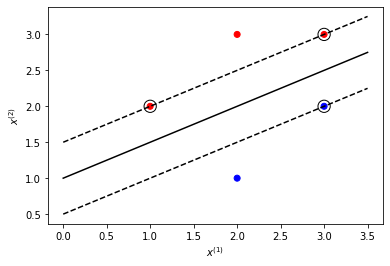

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制数据点
color_seq = ['red' if v == 1 else 'blue' for v in y]
plt.scatter([i[0] for i in X], [i[1] for i in X], c=color_seq)
# 得到x轴的所有点
xaxis = np.linspace(0, 3.5)
w = clf.coef_[0]
# 计算斜率
a = -w[0] / w[1]
# 得到分离超平面
y_sep = a * xaxis - (clf.intercept_[0]) / w[1]
# 下边界超平面
b = clf.support_vectors_[0]
yy_down = a * xaxis + (b[1] - a * b[0])
# 上边界超平面
b = clf.support_vectors_[-1]
yy_up = a * xaxis + (b[1] - a * b[0])
# 绘制超平面
plt.plot(xaxis, y_sep, 'k-')
plt.plot(xaxis, yy_down, 'k--')
plt.plot(xaxis, yy_up, 'k--')
# 绘制支持向量
plt.xlabel('$x^{(1)}$')
plt.ylabel('$x^{(2)}$')
plt.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors='none',
            edgecolors='k')
plt.show()

### 习题7.3

&emsp;&emsp;线性支持向量机还可以定义为以下形式：$$\begin{array}{cl} 
\displaystyle \min_{w,b,\xi} & \displaystyle \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 \\
\text{s.t.} & y_i(w \cdot x_i + b) \geqslant 1 - \xi_i, i=1,2,\cdots, N \\
& \xi_i \geqslant 0, i=1,2,\cdots, N
\end{array}$$试求其对偶形式。

**解答：**  
根据支持向量机的对偶算法，得到对偶形式，由于不能消去变量$\xi_i$的部分，所以拉格朗日因子也包含$\beta_i$。  
拉格朗日函数为：$$L(w,b,\xi, \alpha, \beta) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^N \xi_i^2 + \sum_{i=1}^N \alpha_i - \sum_{i=1}^N \alpha_i \xi_i - \sum_{i=1}^N \alpha_i y_i (w \cdot x_i + b) - \sum_{i=1}^N \beta_i \xi_i$$  
分别求$w,b,\xi$的偏导数：$$\left \{ \begin{array}{l}
\displaystyle \nabla_w L  = w - \sum_{i=1}^N \alpha_i y_i x_i = 0 \\ 
\displaystyle \nabla_b L  =  -\sum_{i=1}^N \alpha_i y_i = 0 \\
\nabla_{\xi} L  = 2C \xi_i - \alpha_i - \beta_i = 0 
\end{array} \right.$$化简可得：$$\left \{ \begin{array}{l}
\displaystyle w = \sum_{i=1}^N \alpha_i y_i x_i = 0 \\ 
\displaystyle \sum_{i=1}^N \alpha_i y_i = 0 \\
2C \xi_i - \alpha_i - \beta_i = 0 
\end{array} \right.$$  
可解得：$$
L=-\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j (x_i \cdot x_{j})+\sum_{i=1}^N \alpha_i-\frac{1}{4C}\sum_{i=1}^N(\alpha_i+\beta_i)^2$$

### 习题7.4

&emsp;&emsp;证明内积的正整数幂函数：$$K(x,z)=(x\cdot z)^p$$是正定核函数，这里$p$是正整数，$ x,z\in R^n$。

**解答：**  
根据书中第121页定理7.5可知，如果需要证明$K(x,z)$是正定核函数，即证明$K(x,z)$对应的Gram矩阵$K=\left[ K(x_i,x_j) \right]_{m \times m}$是半正定矩阵。  
对任意$c_1,c_2,\cdots,c_m \in \mathbf{R}$，有$$\begin{aligned} 
\sum_{i,j=1}^m c_i c_j K(x_i,x_j) 
&= \sum_{i,j=1}^m c_i c_j (x_i \cdot x_j)^p \\
&= \left(\sum_{i=1}^m c_i x_i \right)\left(\sum_{j=1}^m c_i x_j \right)(x_i \cdot x_j)^{p-1} \\
&= \Bigg\|\left( \sum_{i=1}^m c_i x_i \right)\Bigg\|^2 (x_i \cdot x_j)^{p-1}
\end{aligned}$$
$\because p$是正整数，$p \geqslant 1$  
$\therefore p-1 \geqslant 0 \Rightarrow (x_i \cdot x_j)^{p-1} \geqslant 0$  
故$\displaystyle \sum_{i,j=1}^m c_i c_j K(x_i,x_j) \geqslant 0$，即Gram矩阵是半正定矩阵。  
根据定理7.5，可得$K(x,z)$是正定核函数，得证。

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)